<a href="https://colab.research.google.com/github/santhoshmc/machine-learning/blob/main/MachineLearning_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to follow

1. Read the data/ Load the data
2. Data Preprocessing/ Cleaning
3. Feature Engineering/ Encoding
4. Selecting Features(X) and Target Column(Y)
5. Prepare train and Test set
6. Select the model/ Import the model from sklearn
7. Train the model using train data set
8. Evaluate the model using test data set
9. Save the model/Deploy the model



Use Logistic regression model from sklearn to classify data from the `iris` dataset specifically `setosa` vs `versicolor` .generate a scatter plot of the data with different colour per class. Then line plot of the models decision boudary on the top.

In [2]:
import seaborn as sns

In [3]:
irisdf=sns.load_dataset("iris")
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
irisdf.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
reqdf=irisdf[['petal_length','petal_width','species']]
reqdf.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [6]:
mask=reqdf['species'].isin(['setosa','versicolor'])
mask

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [7]:
reqdf[mask]

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
95,4.2,1.2,versicolor
96,4.2,1.3,versicolor
97,4.3,1.3,versicolor
98,3.0,1.1,versicolor


In [8]:
reqdf=reqdf[mask]

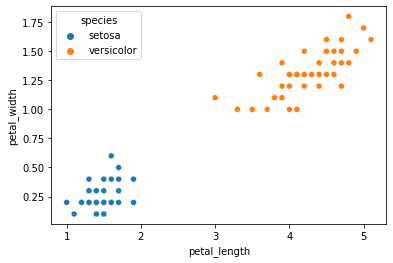

In [9]:
sns.scatterplot(data=reqdf, x='petal_length', y='petal_width', hue='species');


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Initialize the label encoder
le=LabelEncoder()

# Fitting the label encoder
le.fit(reqdf['species'])

print(le.classes_)

['setosa' 'versicolor']


In [12]:
# Tranforming the species coloumn
y=le.transform(reqdf['species'])

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
X=reqdf[['petal_length','petal_width']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((67, 2), (33, 2), (67,), (33,))

Steps to Apply sklearn machine learning models
1. Import the model from sklearn
2. Initialise the model with proper hyper parameters if any
3. train/fit the model on the train dataset
4. Evaluate the model on test dataset
5. Save the model



In [18]:
#Import the model from sklearn
from sklearn.linear_model import LogisticRegression

In [19]:
#initialise the model
model=LogisticRegression()

In [21]:
#Train the model
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Evaluate the model
y_hat=model.predict(X_test)

In [23]:
y_hat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [24]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [25]:
sum(y_hat!=y_test)

0

In [26]:
def boundary_fn(model):
  m=-model.coef_[0][0]/model.coef_[0][1]
  q=-model.intercept_[0]/model.coef_[0][1]
  decision_boundary_fn=lambda x: m*x+q
  return decision_boundary_fn


In [27]:
petal_length=reqdf['petal_length']

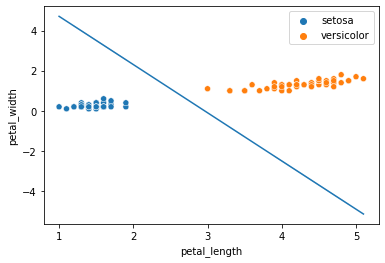

In [30]:
import matplotlib.pyplot as plt
sns.scatterplot(data=reqdf, x='petal_length', y='petal_width', hue='species')
boundary_line=boundary_fn(model)
sns.lineplot(x=petal_length,y=boundary_line(petal_length))
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [34]:
conf_mat=confusion_matrix(y_test,y_hat)

In [35]:
conf_mat

array([[19,  0],
       [ 0, 14]])

In [36]:
import numpy as np
classes=np.unique(reqdf['species'])

In [37]:
classes

array(['setosa', 'versicolor'], dtype=object)

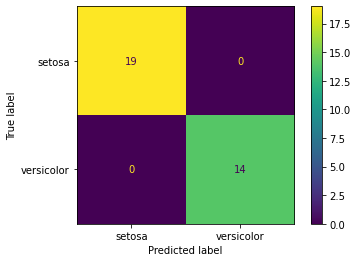

In [39]:
ConfusionMatrixDisplay(conf_mat,display_labels=classes).plot();

In [40]:
import pandas as pd
conf_df=pd.DataFrame(conf_mat, columns=classes, index=classes)
conf_df

,setosa,versicolor
setosa,19,0
versicolor,0,14


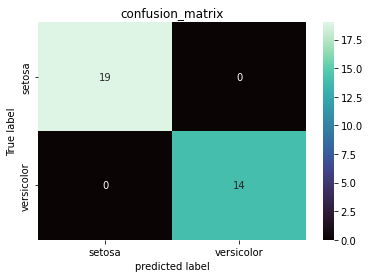

In [41]:
ax=sns.heatmap(conf_df,
               annot=True,
               cmap=sns.color_palette('mako', as_cmap=True))
ax.title.set_text('confusion_matrix')
ax.set(xlabel='predicted label', ylabel='True label')
plt.show()